## Plots showing WSU data properties

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots

## read in data files

In [3]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

In [4]:
# update after first revisions of impact statement
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230420.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230420.ecsv')

In [5]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [6]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [7]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

In [8]:
# per MOUS/src
result_c7_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle7_20230420.ecsv')
result_c8_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle8_20230420.ecsv')

In [9]:
wsu_all_src = vstack([result_c7_mous_src,result_c8_mous_src])

In [10]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','b

In [11]:
# original Cycle 7 and Cycle 8 data
cycle7tab = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')
cycle8tab = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

In [12]:
cycle7_cycle8_orig = vstack([cycle7tab,cycle8tab])

In [13]:
cycle7_cycle8_orig.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [201]:
np.max(wsu_all['blc_nspw'] * wsu_all['ntarget'] )

600.0

In [202]:
np.max(wsu_all['blc_nspw']) * np.max(wsu_all['ntarget'])

3000.0

150.0

In [199]:
np.max(wsu_all['blc_nchan_max'])

7680.0

In [197]:
20*150

3000

## Plot cube sizes

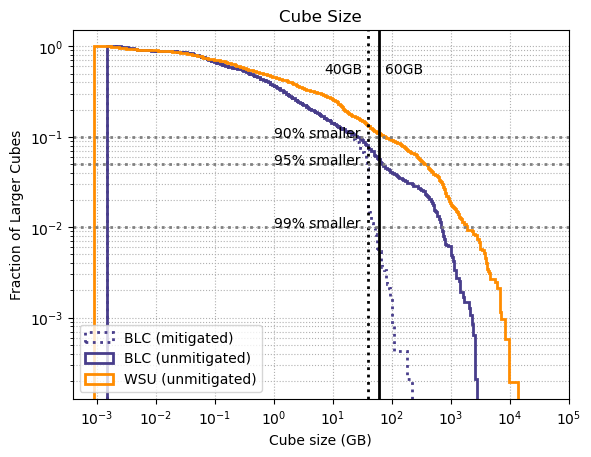

In [14]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all,
                                   figname='plots/cubesize_distribution.png')

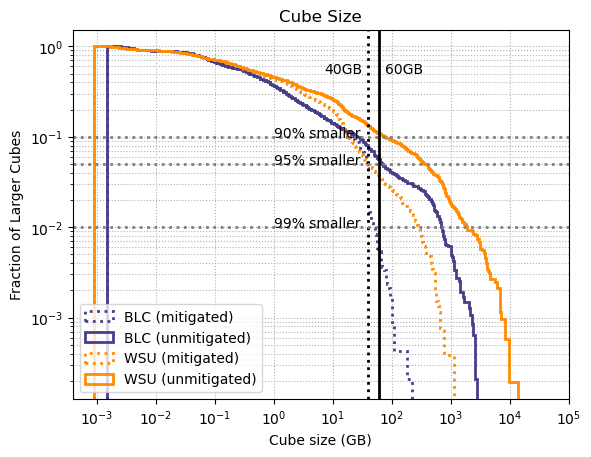

In [15]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all,
                                   mitigated_wsu=True,
                                   figname='plots/cubesize_distribution_mitigatedwsu.png')

In [16]:
np.max(wsu_all['wsu_cubesize_stepped2']).to('TB')

<Quantity 14.09039169 Tbyte>

In [17]:
bin_max=14 #TB
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1079: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


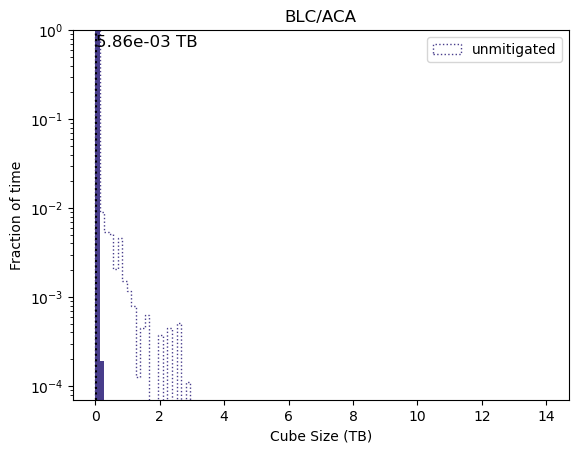

In [18]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='mitigatedcubesize',
                                    title='BLC/ACA',
                                    add_wavg=True,
                                    pltname='plots/cubesize_blc.png')

In [19]:
np.nansum(wsu_all['mitigatedcubesize'] > 60*u.GB)/len(wsu_all)*100

0.5192307692307693

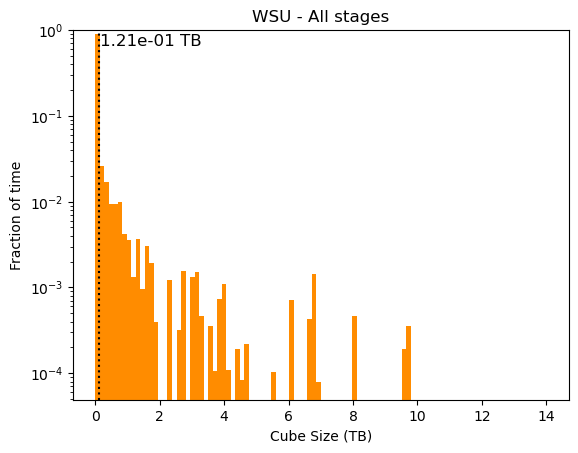

In [20]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='wsu_cubesize_stepped2',
                                    title='WSU - All stages',
                                    add_wavg=True,
                                    pltname='plots/cubesize_wsu.png')

In [21]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

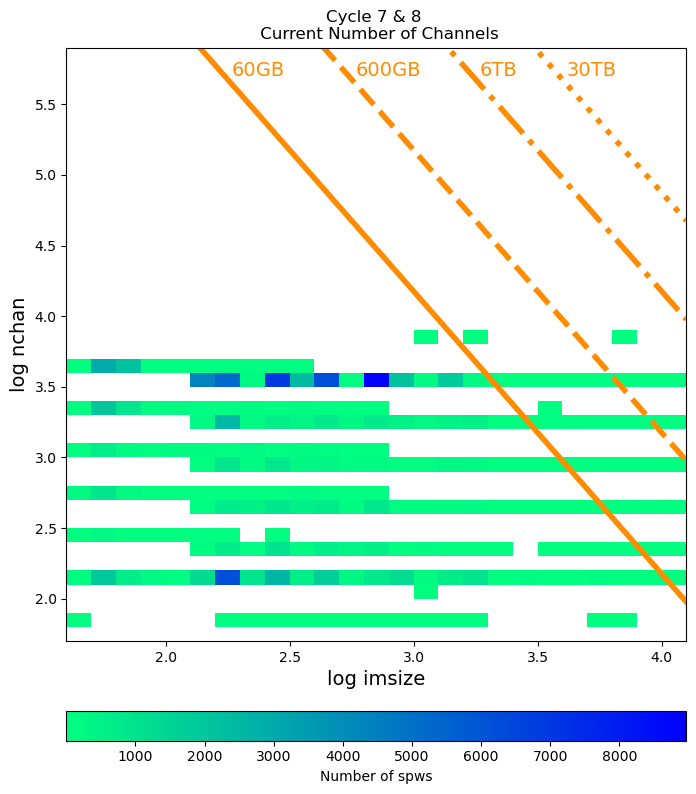

In [22]:
## This uses the original mous/src/spw database. The total number of rows = src * spw
reload(wsu_plots)
h_current, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(cycle7_cycle8_orig, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels',
                                                            cmap='winter_r',
                                                            band2_specscan=False,
                                                            mit_limits=True,
                                                            pltname='plots/density_plot_nolines.png')

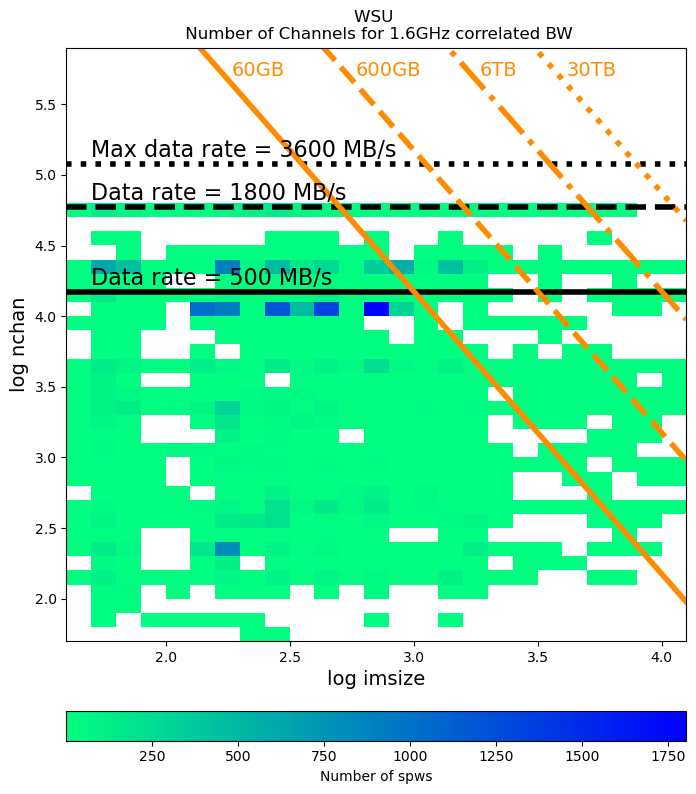

In [23]:
# This version doesn't have any weights so it's number of srcs
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU \n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',
                                                                band2_specscan=True,nspw=10,
                                                                pltname='plots/density_plot_wsu_spw.png')

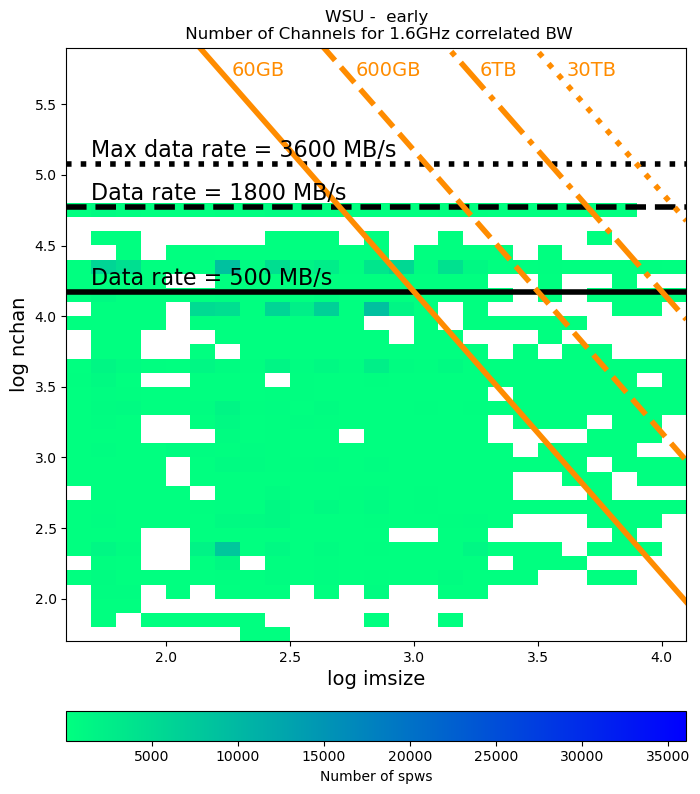

In [24]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU -  early\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_early'],
                                                                pltname='plots/density_plot_wsu_spw_early.png')

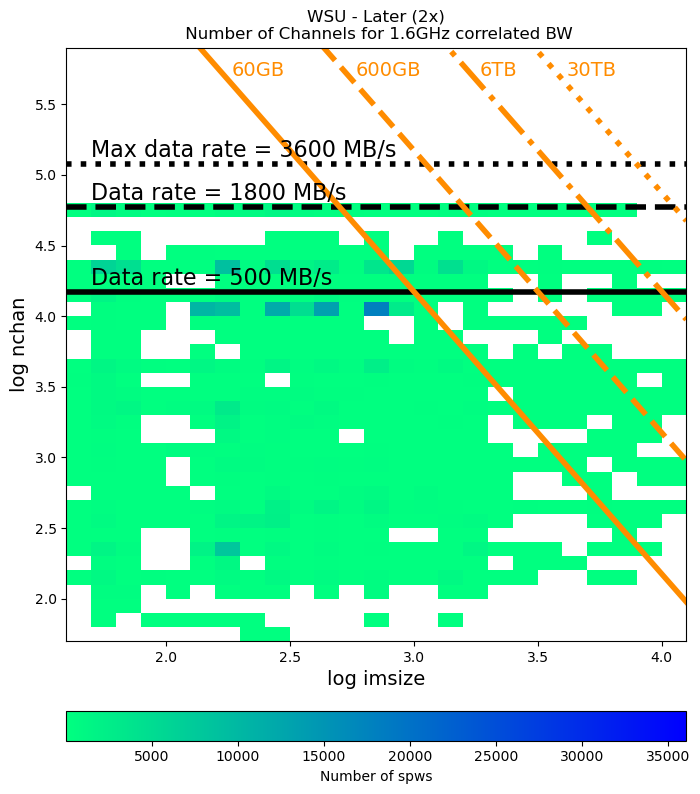

In [25]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later (2x)\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_later_2x'],
                                                                pltname='plots/density_plot_wsu_spw_later_2x.png')

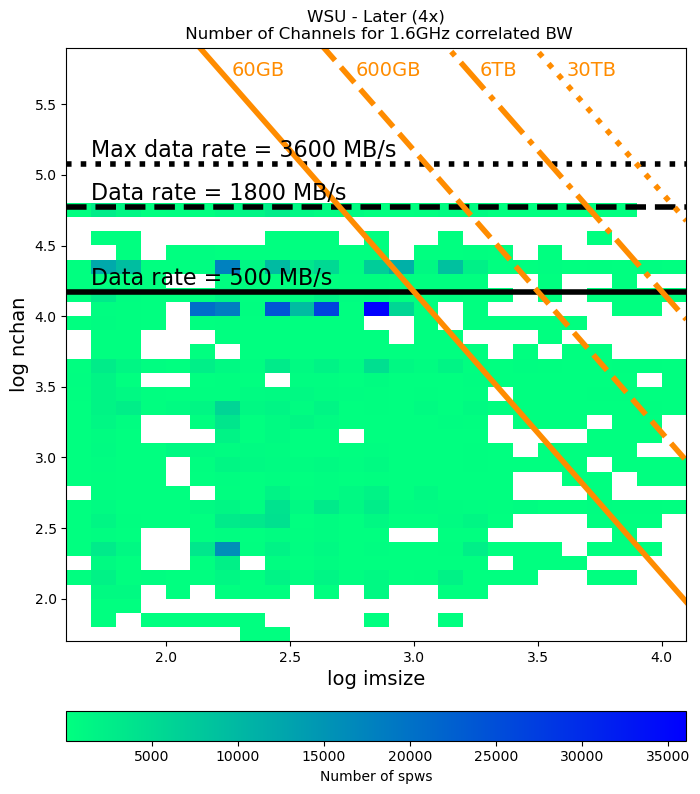

In [26]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later (4x)\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r', vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_later_4x'],
                                                                pltname='plots/density_plot_wsu_spw_later_4x.png')

In [27]:
np.nanmin(h_wsu_spw)

20.0

In [28]:
np.nanmax(h_wsu_spw)

36080.0

## Plot nspws

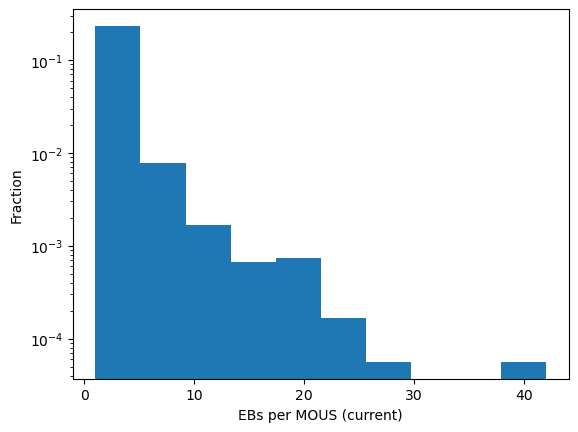

In [29]:
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
plt.hist(wsu_all[idx]['nEB'],log=True,density=True)
plt.xlabel('EBs per MOUS (current)')
plt.ylabel('Fraction')
plt.savefig('plots_pl/nebs_per_mous.png')

In [30]:
np.sum(idx)

4348

In [31]:
np.max(wsu_all['wsu_nspw_later_4x'])

20

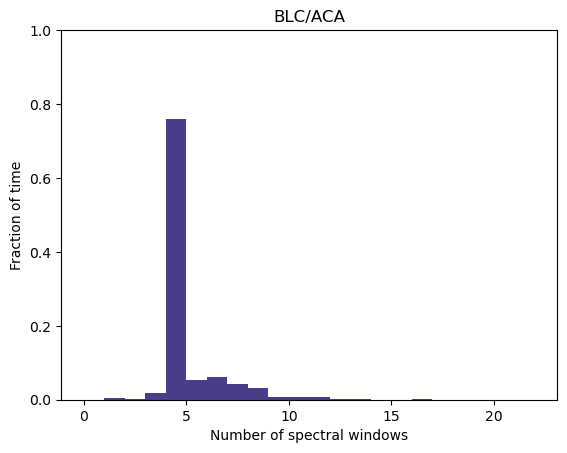

In [32]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='blc_nspw',
                       title='BLC/ACA',
                       pltname='plots/nspw_blc.png')

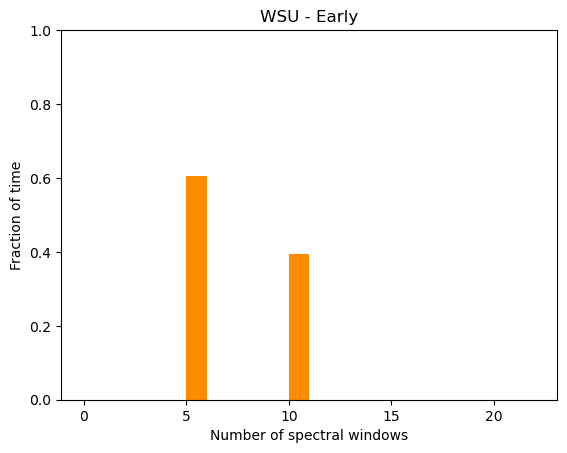

In [33]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_early',
                       title='WSU - Early',
                       pltname='plots/nspw_early.png')

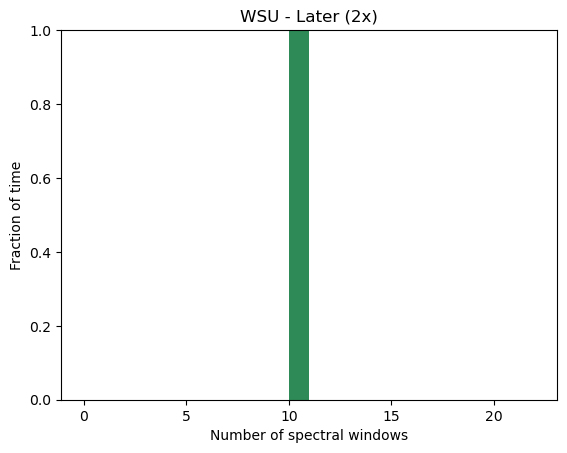

In [34]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_2x',
                       title='WSU - Later (2x)',
                       pltname='plots/nspw_later_2x.png')

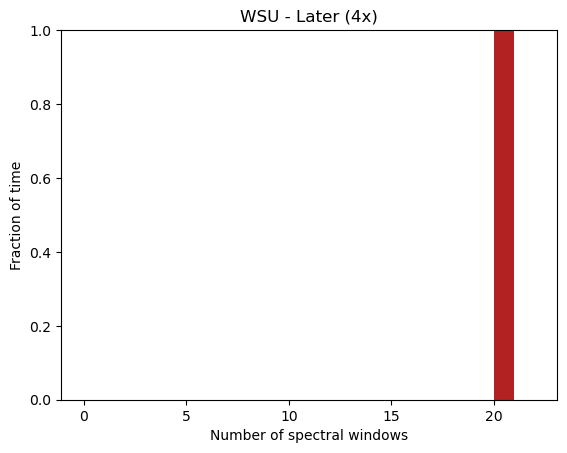

In [35]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_4x',
                       title='WSU - Later (4x)',
                       pltname='plots/nspw_later_4x.png')

## plot productsizes

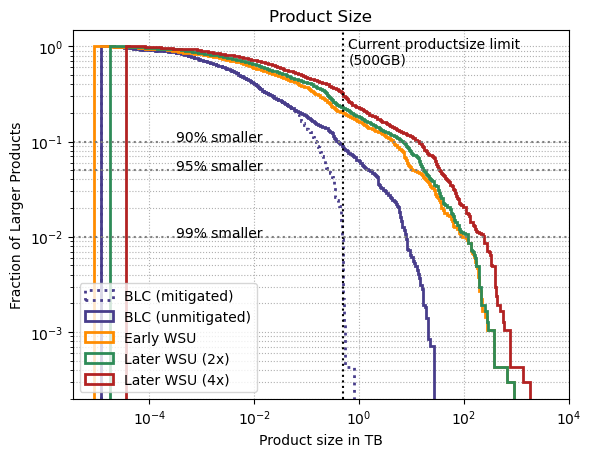

In [36]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all,figname='plots/productsize_distribution.png')

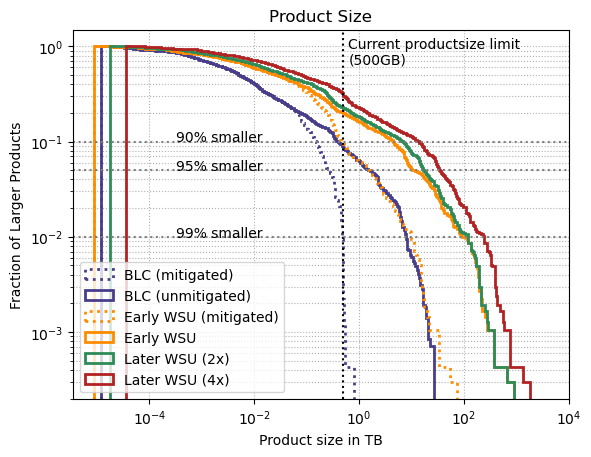

In [37]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all,
                                      mitigated_wsu=True,
                                      figname='plots/productsize_distribution_mitigatedwsu.png')

In [38]:
np.max(wsu_all['wsu_productsize_later_4x_stepped2'].to('TB'))

<Quantity 1854.84179264 Tbyte>

In [39]:
bin_max=2000
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1261: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


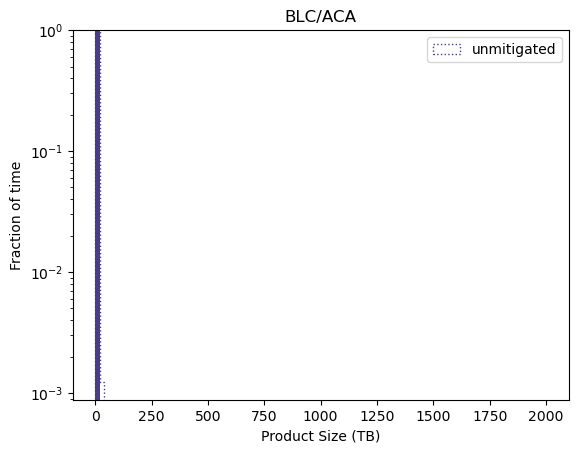

In [40]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='mitigatedprodsize',
                                       title='BLC/ACA',
                                       add_wavg=True,
                                      pltname='plots/productsize_blc.png')

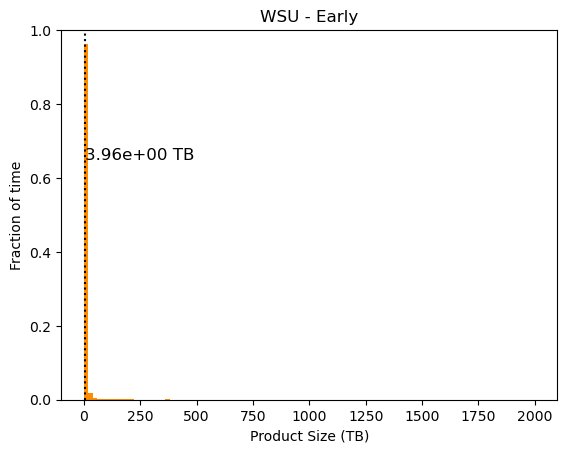

In [41]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                       log=False,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_early_stepped2',
                                       title='WSU - Early',
                                       add_wavg=True,
                                      pltname='plots/productsize_early_linear.png')

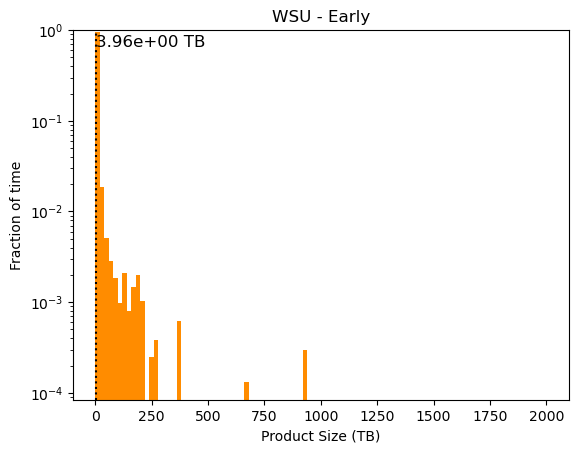

In [42]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_early_stepped2',
                                       title='WSU - Early',
                                       add_wavg=True,
                                      pltname='plots/productsize_early.png')

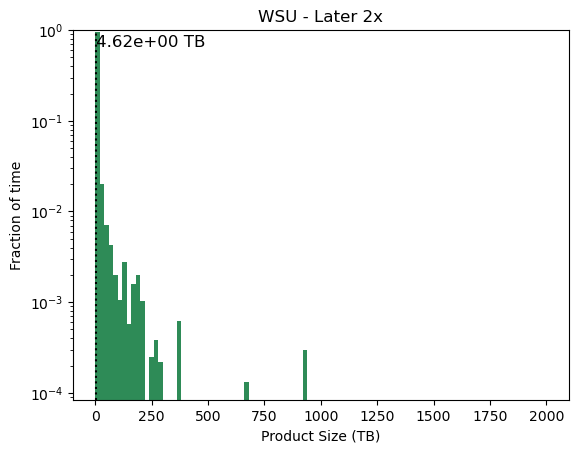

In [43]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_2x_stepped2',
                                       title='WSU - Later 2x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_2x.png')

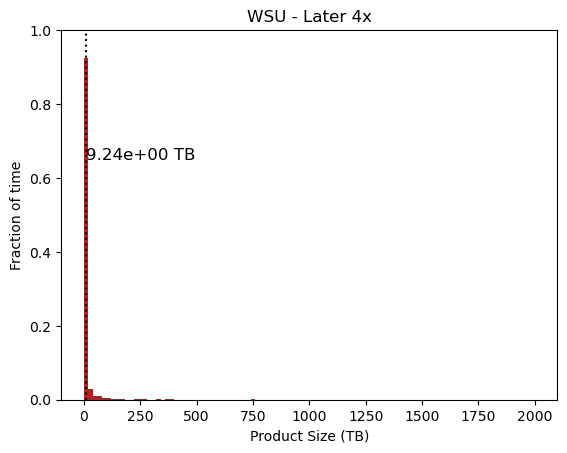

In [44]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                       log=False,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_4x_stepped2',
                                       title='WSU - Later 4x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_4x_linear.png')

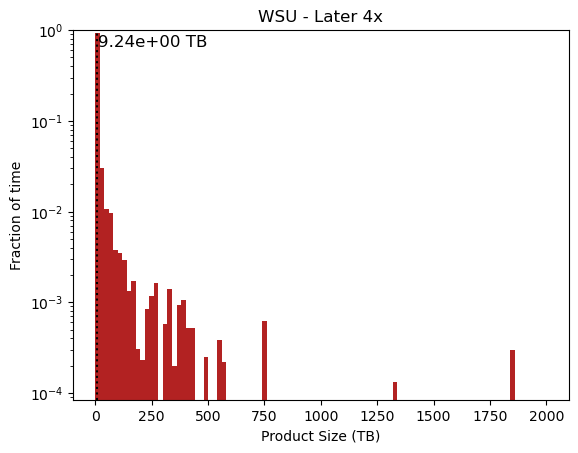

In [45]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_4x_stepped2',
                                       title='WSU - Later 4x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_4x.png')

In [46]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

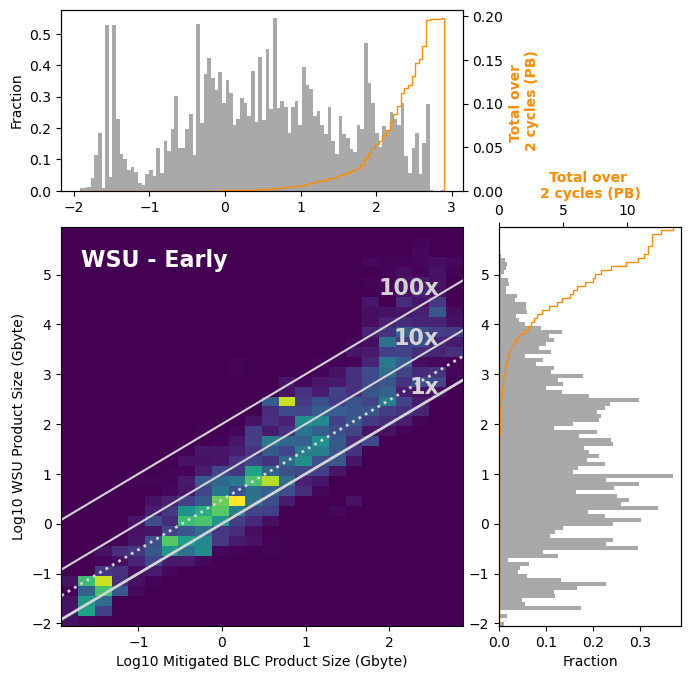

In [48]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='early', plot_title='WSU - Early',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_early.png')

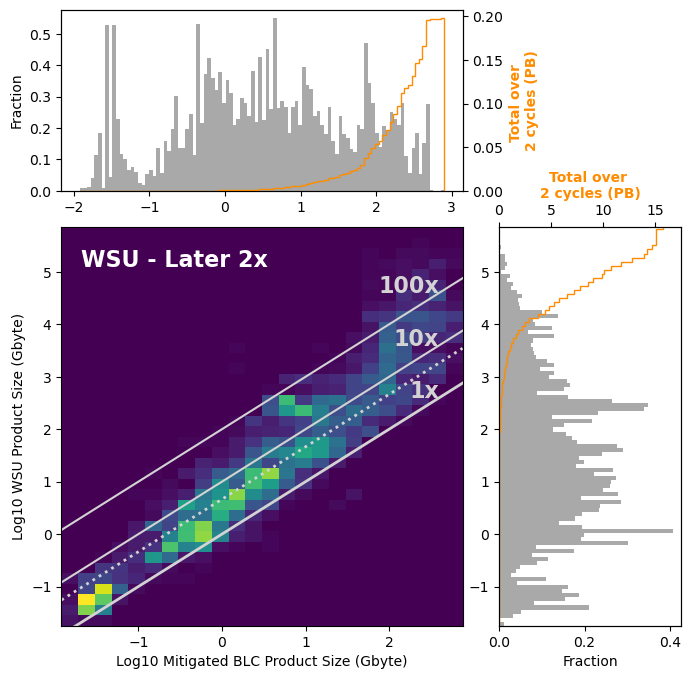

In [50]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='later_2x', plot_title='WSU - Later 2x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_later_2x.png')

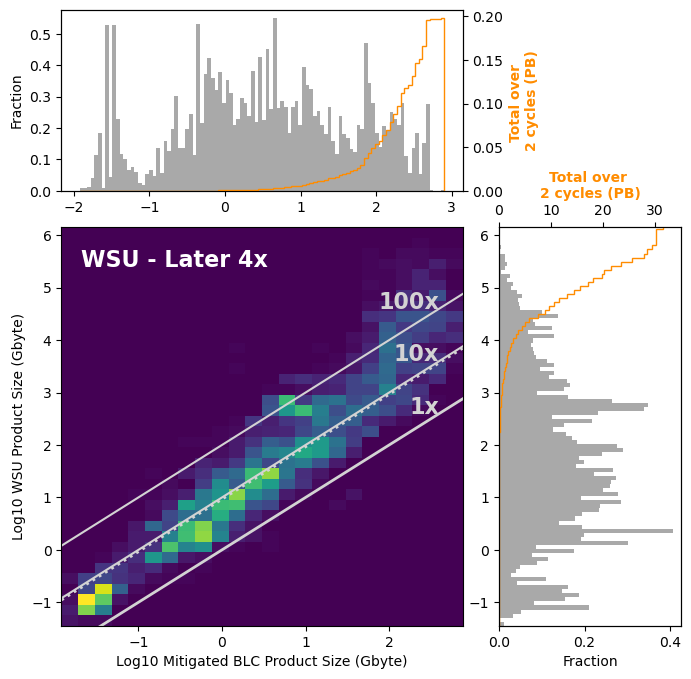

In [51]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='later_4x', plot_title='WSU - Later 4x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_later_4x.png')

median ratio
3.0071763440860213
max ratio
3039.6937896389327
log10 (peak)
0.3602966155977836
peak
2.2924328100635796


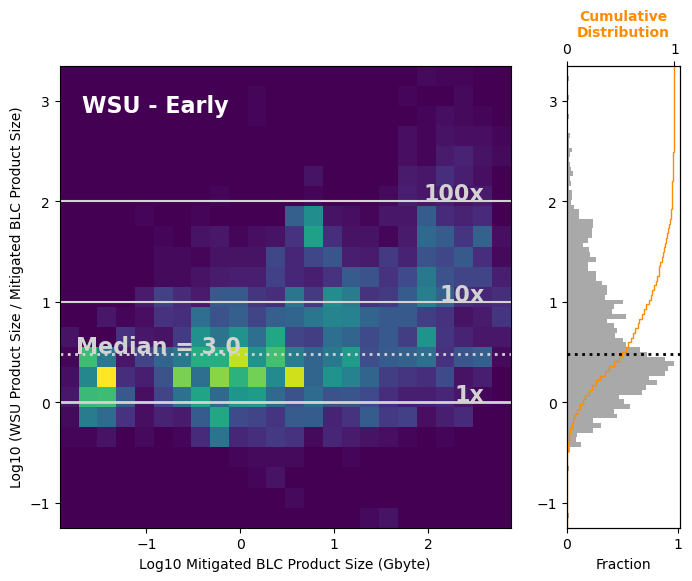

In [52]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='early', plot_title='WSU - Early',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_early.png')

median ratio
4.618375006571215
max ratio
3039.6937896389327
log10 (peak)
0.2488707466126323
peak
1.773661530643455


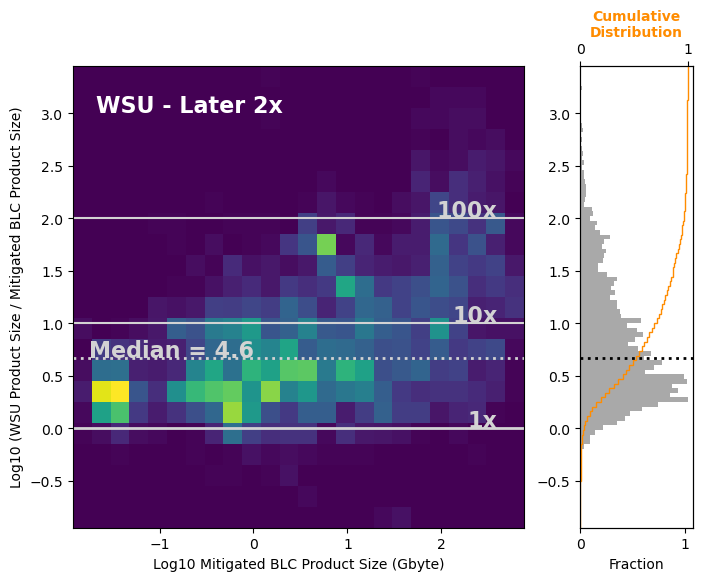

In [53]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='later_2x', plot_title='WSU - Later 2x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_later_2x.png')

median ratio
9.23675001314243
max ratio
6079.387579277865
log10 (peak)
0.5499007422766135
peak
3.5473230612869098


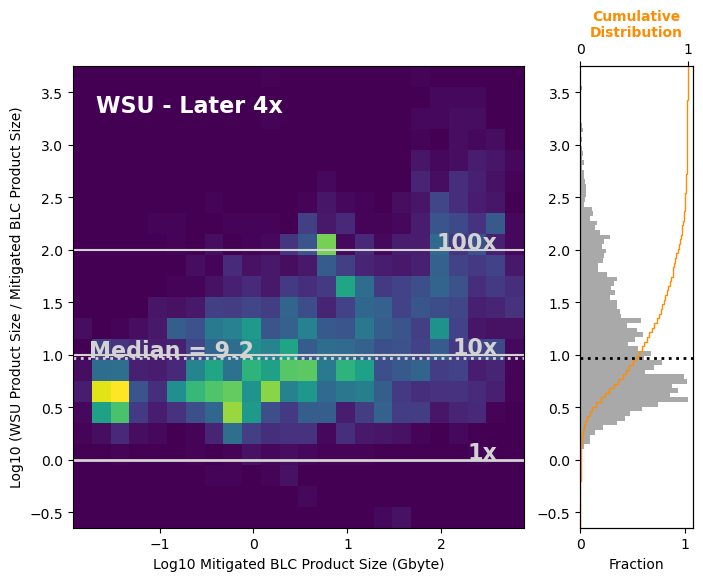

In [54]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='later_4x', plot_title='WSU - Later 4x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_later_4x.png')

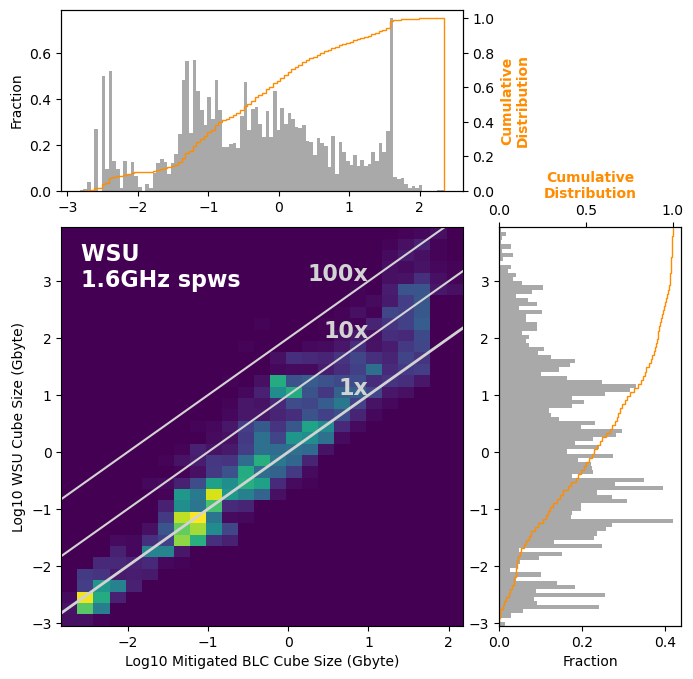

In [56]:
reload(wsu_plots)
wsu_plots.cubesize_comparison_hist_plot(wsu_all,plot_title='WSU \n1.6GHz spws',
                              blc_mitigated=True,wsu_mitigated=False,
                                  pltname='plots/cubesize_comparison.png')

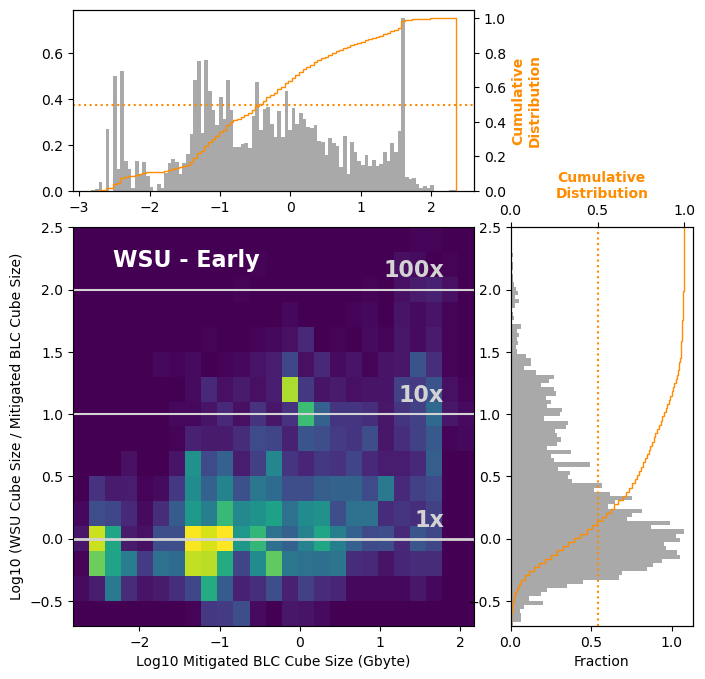

In [57]:
reload(wsu_plots)
wsu_plots.cubesize_ratio_hist_plot(wsu_all,plot_title='WSU - Early',
                              blc_mitigated=True,wsu_mitigated=False,
                              pltname='plots/cubesize_ratio.png')

In [58]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','b

In [59]:
ratio = wsu_all['wsu_productsize_early_stepped2'].value/wsu_all['mitigatedprodsize'].value.filled(np.nan)

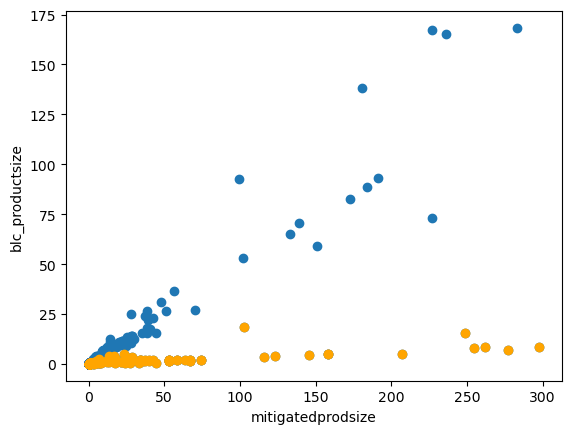

In [60]:
idx = ratio < 1.0

plt.scatter(wsu_all[idx]['mitigatedprodsize'].value.filled(np.nan), 
            wsu_all[idx]['blc_productsize'].value)
plt.xlabel('mitigatedprodsize')

plt.ylabel('blc_productsize')

idx2 = (wsu_all['ntarget'] > 1) & (ratio < 1.0)
plt.scatter(wsu_all[idx2]['mitigatedprodsize'].value.filled(np.nan),
           wsu_all[idx2]['blc_productsize'].value,color='orange')
## BLC with ntargest > 1 is off.

134


Text(0, 0.5, 'wsu_productsize_early_stepped2')

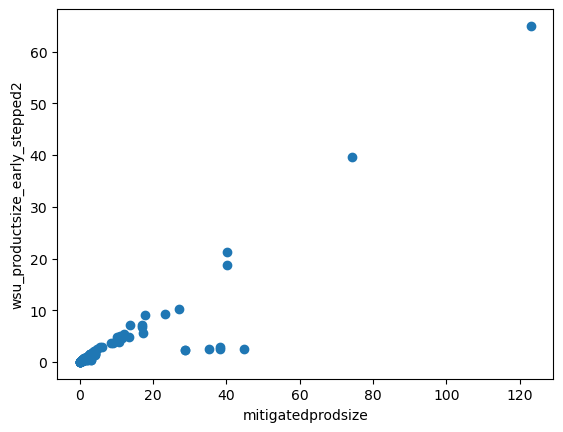

In [61]:
idx = ratio < 0.55
print(np.sum(idx))
plt.scatter(wsu_all[idx]['mitigatedprodsize'],wsu_all[idx]['wsu_productsize_early_stepped2'])
plt.xlabel('mitigatedprodsize')
plt.ylabel('wsu_productsize_early_stepped2')

In [62]:
idx = (ratio< 0.55) & ( wsu_all['mitigatedprodsize'].value.filled(np.nan) > 20) & (wsu_all['wsu_productsize_early_stepped2'].value < 8.0)
wsu_all[idx]['proposal_id','mous','ntarget','imsize','blc_bandwidth_agg','blc_ntunings','mitigatedcubesize','mitigatedprodsize','blc_productsize',
             'wsu_nspw_early','wsu_cubesize_stepped2','mfssize','wsu_productsize_early_stepped2']

proposal_id,mous,ntarget,imsize,blc_bandwidth_agg,blc_ntunings,mitigatedcubesize,mitigatedprodsize,blc_productsize,wsu_nspw_early,wsu_cubesize_stepped2,mfssize,wsu_productsize_early_stepped2
,,,,GHz,,Gbyte,Gbyte,Gbyte,,Gbyte,Gbyte,Gbyte
str14,str22,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
2021.1.01543.S,uid://A001/X158f/X142,1.0,160.0,37.5,5.0,0.96,38.4,15.732736000000001,5,0.2528256,0.0001024,2.52928
2021.1.01543.S,uid://A001/X158f/X146,1.0,170.0,37.5,5.0,0.96,38.4,17.760784,5,0.2854164,0.0001156,2.85532
2021.1.01543.S,uid://A001/X158f/X14a,1.0,160.0,37.5,5.0,1.12,44.8,15.732736000000001,5,0.2528256,0.0001024,2.52928
2021.1.01543.S,uid://A001/X158f/X166,1.0,150.0,37.5,5.0,0.717,28.7,13.8276,5,0.22221,9e-05,2.223
2021.1.01543.S,uid://A001/X15b8/X39,1.0,160.0,37.5,5.0,0.885,35.4,15.732736000000001,5,0.2528256,0.0001024,2.52928
2021.1.01543.S,uid://A001/X15b8/X55,1.0,150.0,37.5,5.0,0.717,28.7,13.8276,5,0.22221,9e-05,2.223


The difference is for a BLC data set that is a multi-tuning data set, which has 5 tunings that spans 37.5 GHz. To potentially make directly comparable, I might have to assume multiple tunings for the WSU.

For the other difference cases, there are very small imsizes (few hundred) that I'm estimating to be too low compared to the value the pipeline determines. 

## plot increase in number of visibilities

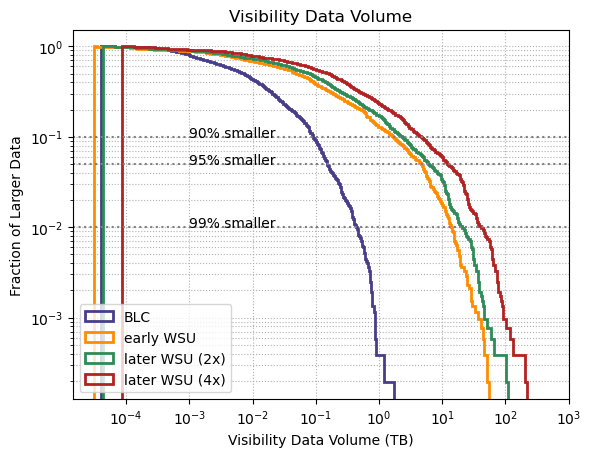

In [63]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all,figname='plots/datavol_distribution.png')

In [64]:
np.max(wsu_all['wsu_datavol_later_4x_stepped2_typical_total'].to('TB'))

<Quantity 218.28626277 Tbyte>

In [65]:
nbin=100
bin_max=250

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1591: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


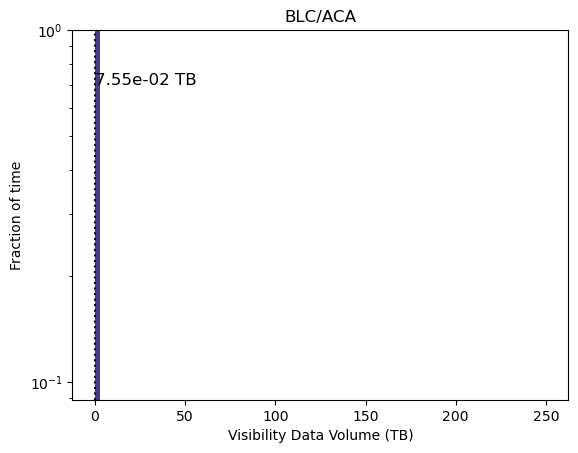

In [66]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                            nbin=nbin,
                            data_val = 'blc_datavol_typical_total',
                            title='BLC/ACA',
                            add_wavg=True,
                            pltname='plots/datavol_blc.png')

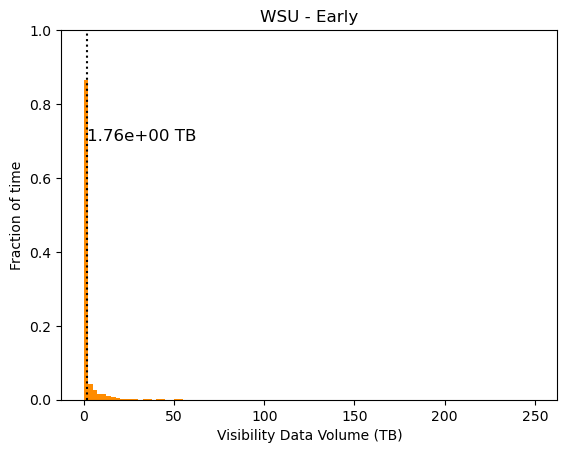

In [67]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250, log=False,
                        nbin=nbin,
                        data_val = 'wsu_datavol_early_stepped2_typical_total',
                            title='WSU - Early',
                        add_wavg=True,
                                  pltname='plots/datavol_early_linear.png')

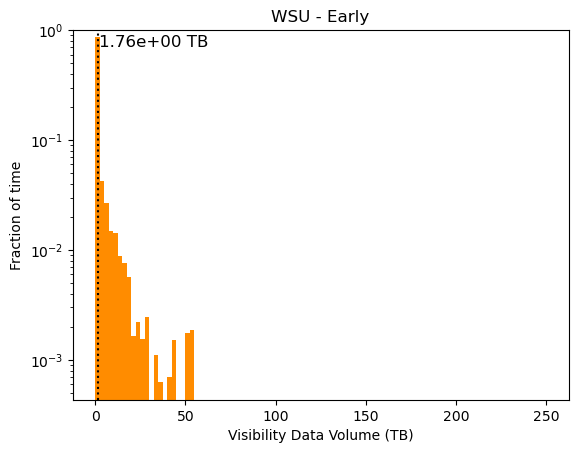

In [68]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_early_stepped2_typical_total',
                            title='WSU - Early',
                        add_wavg=True,
                                  pltname='plots/datavol_early.png')

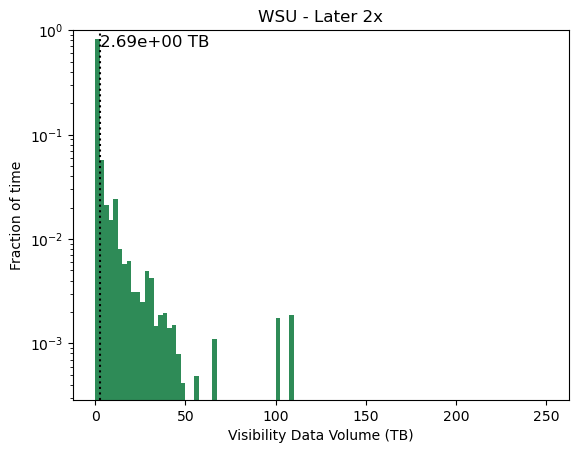

In [69]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_2x_stepped2_typical_total',
                            title='WSU - Later 2x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_2x.png')

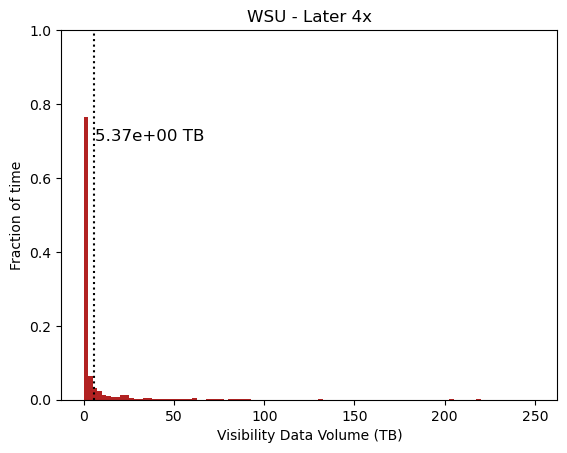

In [70]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,log=False,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_4x_stepped2_typical_total',
                            title='WSU - Later 4x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_4x_linear.png')

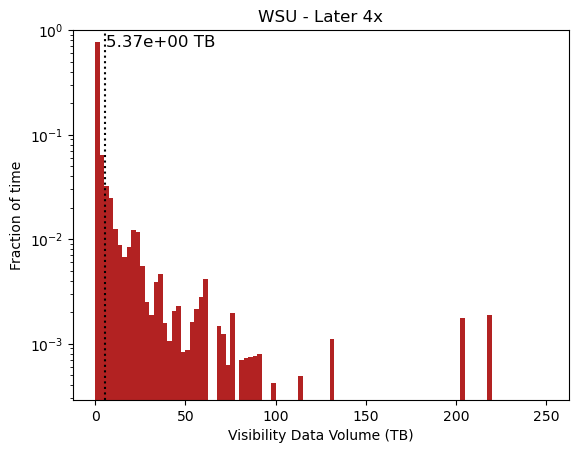

In [71]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_4x_stepped2_typical_total',
                            title='WSU - Later 4x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_4x.png')

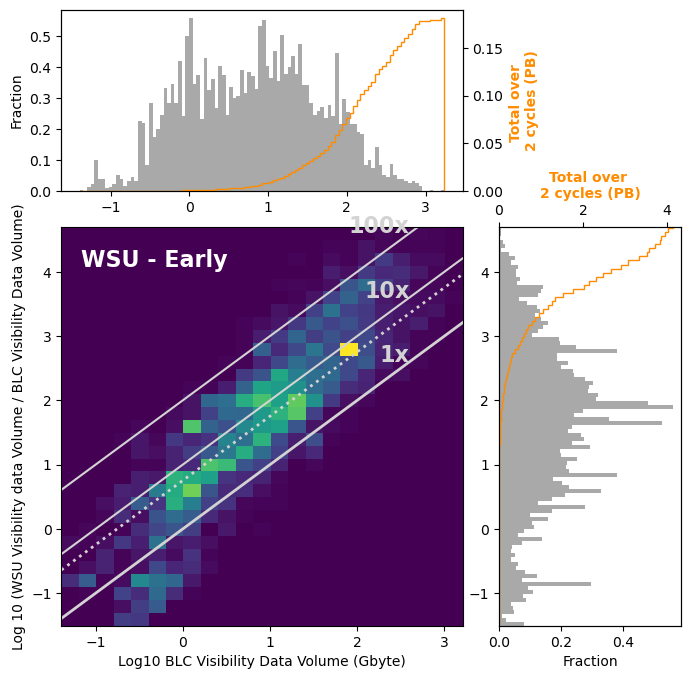

In [72]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='early',plot_title='WSU - Early',
                                         pltname='plots/datavol_comparison_early.png')

Sergio brought up the question that we have some WSU visibility volumes that are less than the BLC visibility volumes. These are mainly low nchan projects from the 7m array which have a smaller tint than the 10.08s I assume for the 7m array currently.

In [80]:
ratio = wsu_all['wsu_datavol_early_stepped2_typical_total'].value/wsu_all['blc_datavol_typical_total'].value

In [116]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

In [131]:
idx = (ratio < 0.5) & (wsu_all['blc_datavol_typical_total'].value > 5)
wsu_all[idx]['proposal_id','mous','wsu_nchan_spw_stepped2','wsu_nspw_early','wsu_datavol_early_stepped2_typical_total','blc_datavol_typical_total','ntarget','blc_nspw','blc_ntunings']

proposal_id,mous,wsu_nchan_spw_stepped2,wsu_nspw_early,wsu_datavol_early_stepped2_typical_total,blc_datavol_typical_total,ntarget,blc_nspw,blc_ntunings
,,,,Gbyte,Gbyte,,,
str14,str22,float64,int64,float64,float64,float64,int64,float64
2019.1.00700.S,uid://A001/X1465/X27f9,71.0,10,4.035418209523809,8.59373568,3.0,8,1.0
2019.1.00203.S,uid://A001/X1465/X36ce,139.0,5,0.940335,6.92736,1.0,4,1.0
2019.1.01832.S,uid://A001/X1465/X41,101.0,10,2.296570319999995,11.642019839999971,29.0,4,1.0
2019.1.01427.S,uid://A001/X1465/Xd55,71.0,10,18.614993676190473,39.642071040000005,1.0,8,1.0
2019.2.00167.S,uid://A001/X14c2/X124,493.0,5,3.231023399999998,6.711091199999997,6.0,4,1.0
2019.2.00167.S,uid://A001/X14c2/X13c,331.0,5,4.587660000000002,14.19264000000001,7.0,4,1.0
2019.2.00081.S,uid://A001/X14c3/X494,493.0,5,15.846005999999997,32.913408,1.0,4,1.0
2021.1.01719.S,uid://A001/X158f/X5f,493.0,5,3.0526066999999997,6.3405056,1.0,4,1.0


In [109]:
idx = wsu_all['mous'] == 'uid://A001/X1465/X41'
wsu_all[idx]['target_time_tot','cal_time','time_tot','wsu_datavol_early_stepped2_typical_total','wsu_datavol_early_stepped2_typical_target_tot','wsu_datavol_early_stepped2_typical_cal']

target_time_tot,cal_time,time_tot,wsu_datavol_early_stepped2_typical_total,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal
s,s,s,Gbyte,Gbyte,Gbyte
float64,float64,float64,float64,float64,float64
32798.30399999987,19293.120000000003,52091.423999999875,2.296570319999995,1.4459887199999946,0.8505816000000003


In [121]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','b

In [129]:
idx = wsu_all_src['mous'] == 'uid://A001/X1465/X41'
wsu_all_src[idx]['array','wsu_nchan_spw_stepped2','wsu_nspw_early','blc_datarate_typical','blc_tint','wsu_datarate_early_stepped2_typical','wsu_tint']

array,wsu_nchan_spw_stepped2,wsu_nspw_early,blc_datarate_typical,blc_tint,wsu_datarate_early_stepped2_typical,wsu_tint
,,,Gbyte / s,s,Gbyte / s,s
str3,float64,int64,float64,float64,float64,float64
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
7m,101.0,10,0.0002234920634920635,1.008,4.408730158730159e-05,10.08
...,...,...,...,...,...,...


Big difference here is that blc_datarate is different because the blc_int is 1.008s instead of 10.08s as we assume for wsu_tint.

(array([117., 104.,  30., 140.,  20.,  15.,  15.,  30.,  21., 112.]),
 array([0.06787109, 0.16014404, 0.25241699, 0.34468994, 0.43696289,
        0.52923584, 0.62150879, 0.71378174, 0.80605469, 0.89832764,
        0.99060059]),
 <BarContainer object of 10 artists>)

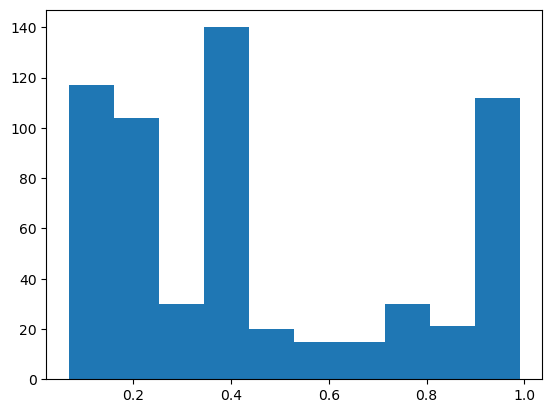

In [134]:
idx = (ratio < 1) 
plt.hist(wsu_all[idx]['wsu_datarate_early_stepped2_typical'].value/wsu_all[idx]['blc_datarate_typical'].value)

(array([ 49.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 445.]),
 array([ 3.024 ,  3.7296,  4.4352,  5.1408,  5.8464,  6.552 ,  7.2576,
         7.9632,  8.6688,  9.3744, 10.08  ]),
 <BarContainer object of 10 artists>)

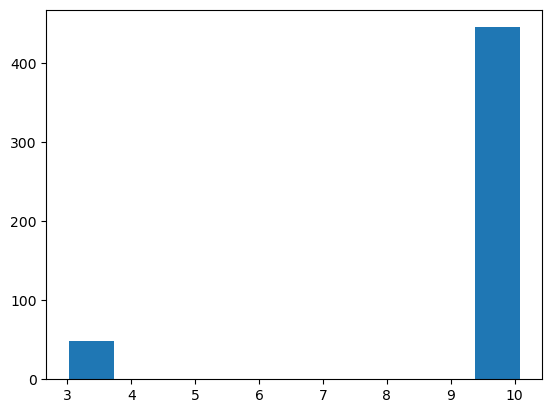

In [139]:
idx = (ratio < 0.9) 
plt.hist(wsu_all[idx]['wsu_tint'].value)

(array([  0.,   0.,   0.,   0.,   0., 124.,   0.,   0.,   0.,   0.]),
 array([2.524, 2.624, 2.724, 2.824, 2.924, 3.024, 3.124, 3.224, 3.324,
        3.424, 3.524]),
 <BarContainer object of 10 artists>)

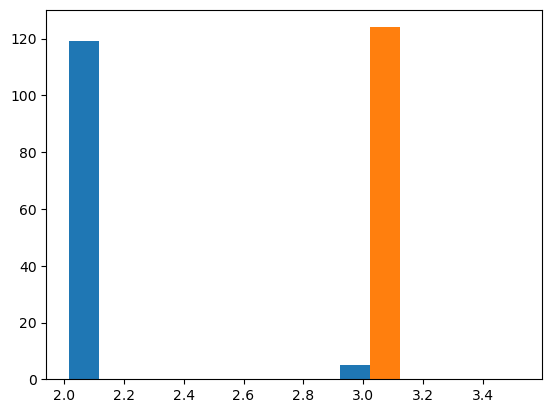

In [147]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '12m')
plt.hist(wsu_all[idx]['blc_tint'].value)
plt.hist(wsu_all[idx]['wsu_tint'].value)

(array([  0.,   0.,   0.,   0.,   0., 480.,   0.,   0.,   0.,   0.]),
 array([ 9.58,  9.68,  9.78,  9.88,  9.98, 10.08, 10.18, 10.28, 10.38,
        10.48, 10.58]),
 <BarContainer object of 10 artists>)

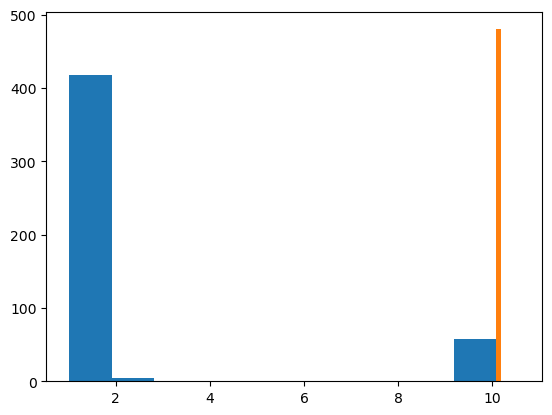

In [152]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '7m')
plt.hist(wsu_all[idx]['blc_tint'].value)
plt.hist(wsu_all[idx]['wsu_tint'].value)

In [160]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '7m') & (wsu_all['blc_tint'].value > 7)
wsu_all[idx]['proposal_id','mous','blc_tint','wsu_tint','blc_datarate_typical','wsu_datarate_early_stepped2_typical','blc_datavol_typical_total','wsu_datavol_early_stepped2_typical_total']

proposal_id,mous,blc_tint,wsu_tint,blc_datarate_typical,wsu_datarate_early_stepped2_typical,blc_datavol_typical_total,wsu_datavol_early_stepped2_typical_total
,,s,s,Gbyte / s,Gbyte / s,Gbyte,Gbyte
str14,str22,float64,float64,float64,float64,float64,float64
2019.1.01326.S,uid://A001/X1465/X1002,10.08,10.08,0.0006257777777777777,0.0005746626984126984,2.2329753599999997,2.0505804
2019.1.01251.S,uid://A001/X1465/X132f,10.08,10.08,0.0003575873015873016,0.00035422619047619045,15.322644480000001,15.1786206
2019.1.01326.S,uid://A001/X1465/Xfd2,10.08,10.08,0.0007151746031746032,0.0005746626984126984,1.4057472,1.129557
2019.1.01326.S,uid://A001/X1465/Xfd8,10.08,10.08,0.0007151746031746032,0.0005746626984126984,1.2759859199999999,1.0252902
2019.1.01326.S,uid://A001/X1465/Xfde,10.08,10.08,0.0007151746031746032,0.0005746626984126984,1.2759859199999999,1.0252902
2019.1.01326.S,uid://A001/X1465/Xfe4,10.08,10.08,0.0007151746031746032,0.0005746626984126984,1.4057472,1.129557
2019.1.01326.S,uid://A001/X1465/Xfea,10.08,10.08,0.0007151746031746032,0.0005746626984126984,1.2759859199999999,1.0252902
...,...,...,...,...,...,...,...


(array([ 1.,  0.,  0.,  0.,  0., 20.,  0.,  1.,  1., 34.]),
 array([0.53955078, 0.58465576, 0.62976074, 0.67486572, 0.7199707 ,
        0.76507568, 0.81018066, 0.85528564, 0.90039062, 0.94549561,
        0.99060059]),
 <BarContainer object of 10 artists>)

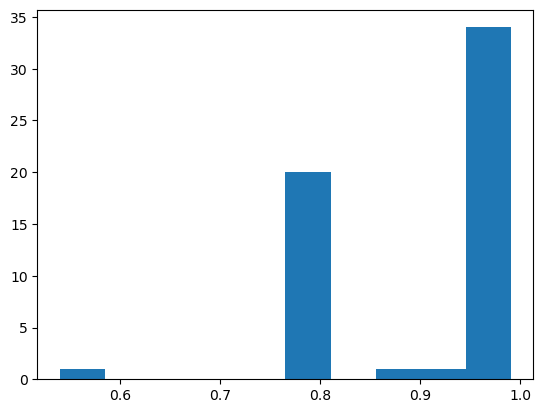

In [166]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '7m') & (wsu_all['blc_tint'].value > 7)
plt.hist(wsu_all[idx]['wsu_datavol_early_stepped2_typical_total'].value/wsu_all[idx]['blc_datavol_typical_total'].value)

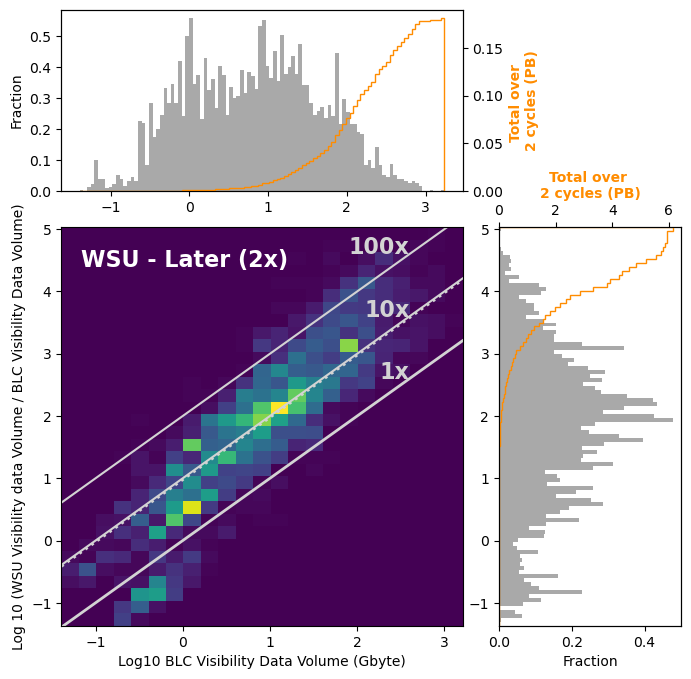

In [167]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='later_2x',plot_title='WSU - Later (2x)',
                                         pltname='plots/datavol_comparison_later_2x.png')

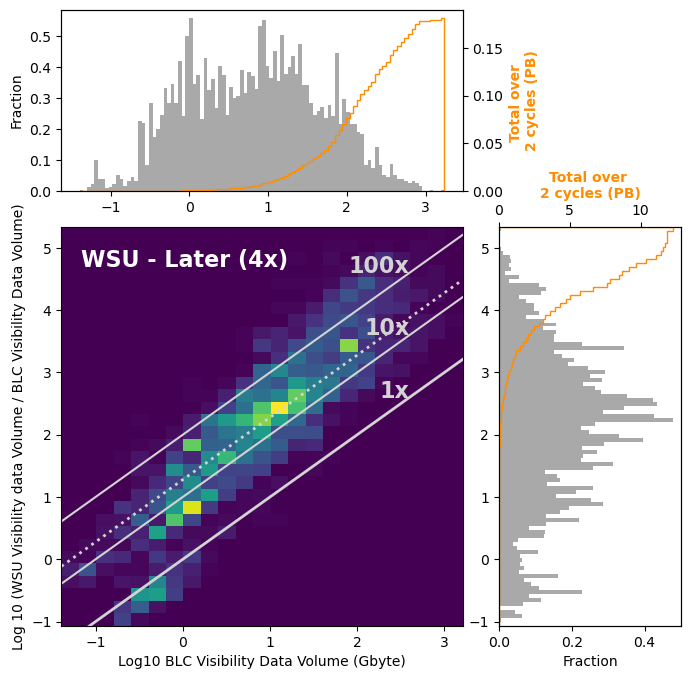

In [168]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='later_4x',plot_title='WSU - Later (4x)',
                                         pltname='plots/datavol_comparison_later_4x.png')

median ratio
5.67138671875
max ratio
881.8303571428571


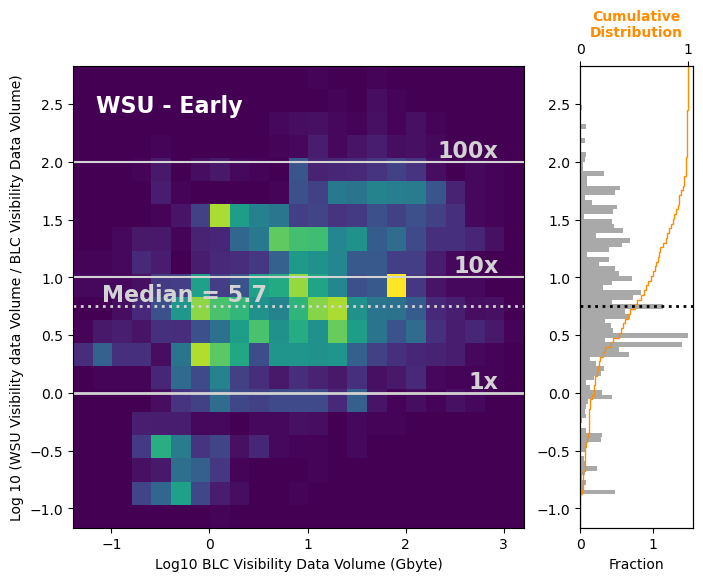

In [169]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='early',plot_title='WSU - Early',
                                         pltname='plots/datavol_ratio_early.png')

median ratio
9.495833333333332
max ratio
1763.6607142857142


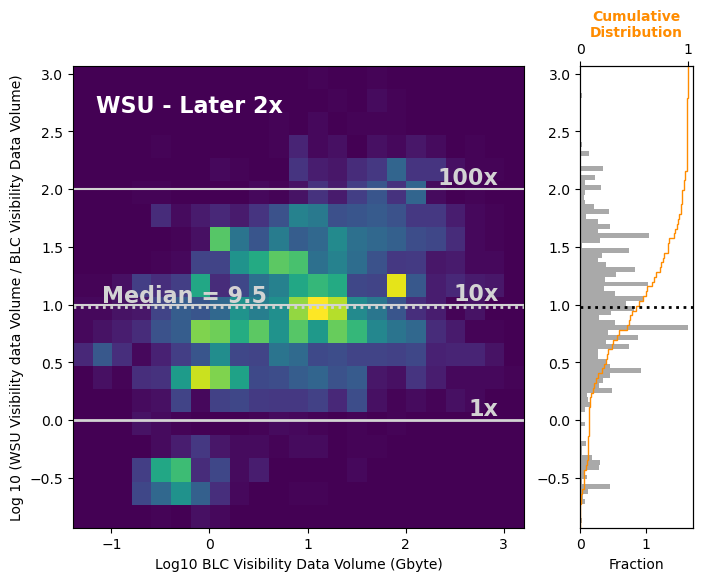

In [170]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='later_2x',plot_title='WSU - Later 2x',
                                         pltname='plots/datavol_ratio_later_2x.png')

median ratio
18.991666666666664
max ratio
3527.3214285714284


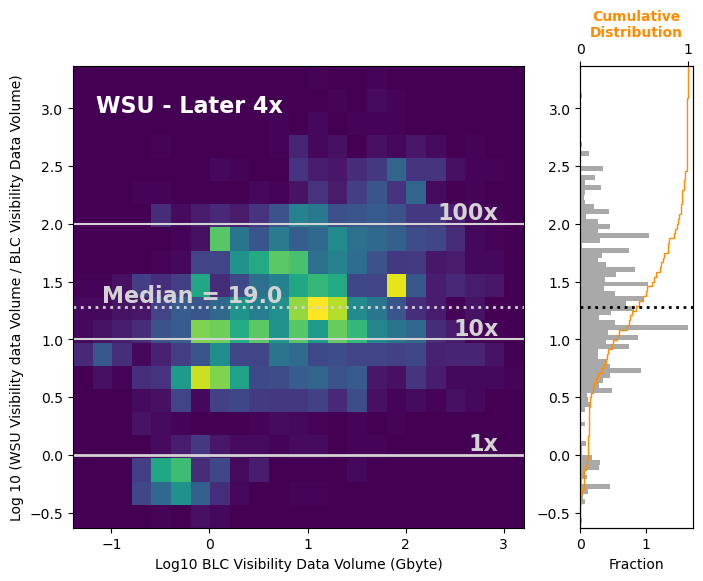

In [171]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='later_4x',plot_title='WSU - Later 4x',
                                         pltname='plots/datavol_ratio_later_4x.png')

## plot data rate

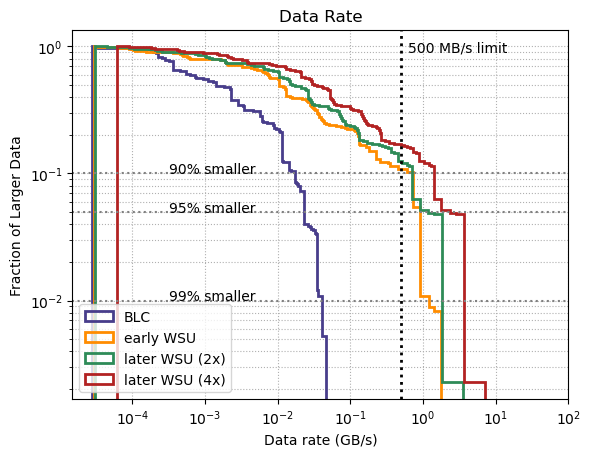

In [172]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison(wsu_all,figname='plots/datarate_distribution.png')

In [173]:
np.max(wsu_all['wsu_datarate_later_4x_stepped2_typical'])

<Quantity 7.07345524 Gbyte / s>

In [174]:
bin_max=7.2
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1751: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


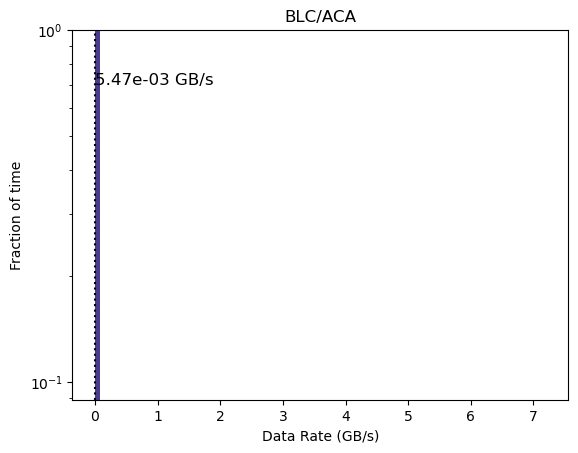

In [175]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'blc_datarate_typical',
                                   title='BLC/ACA',
                                   add_wavg=True,
                                   pltname='plots/datarate_blc.png')

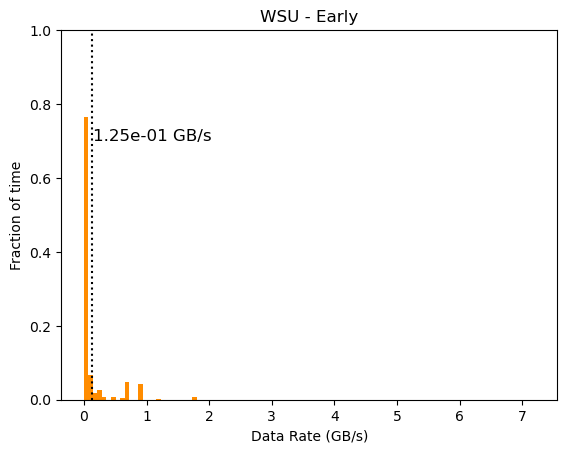

In [176]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_early_stepped2_typical',log=False,
                                   title='WSU - Early',
                                   add_wavg=True,
                                   pltname='plots/datarate_early_linear.png')

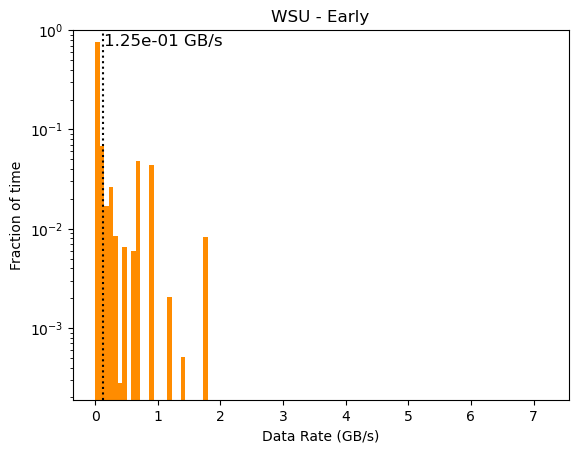

In [177]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_early_stepped2_typical',
                                   title='WSU - Early',
                                   add_wavg=True,
                                   pltname='plots/datarate_early.png')

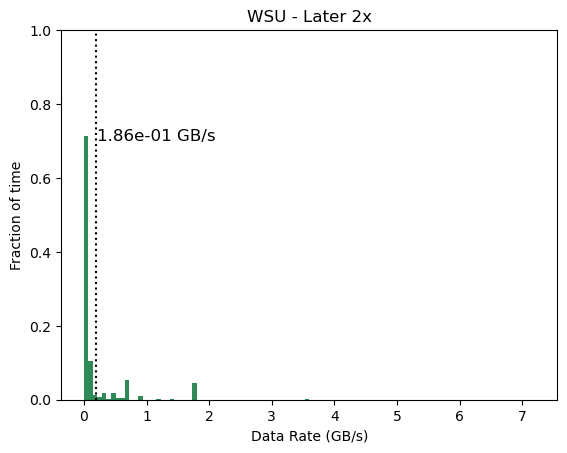

In [178]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=False,
                                   data_val= 'wsu_datarate_later_2x_stepped2_typical',
                                   title='WSU - Later 2x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_2x_linear.png')

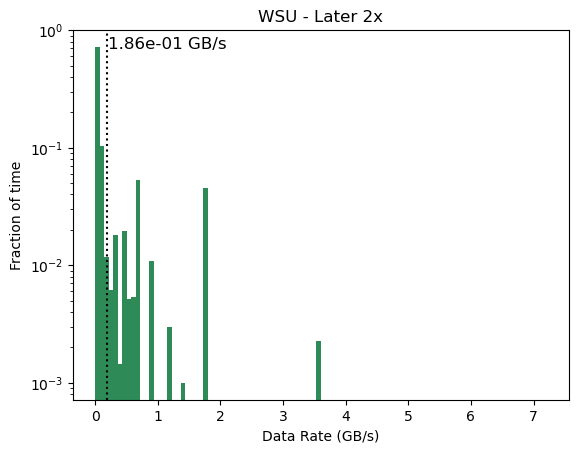

In [179]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_later_2x_stepped2_typical',
                                   title='WSU - Later 2x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_2x.png')

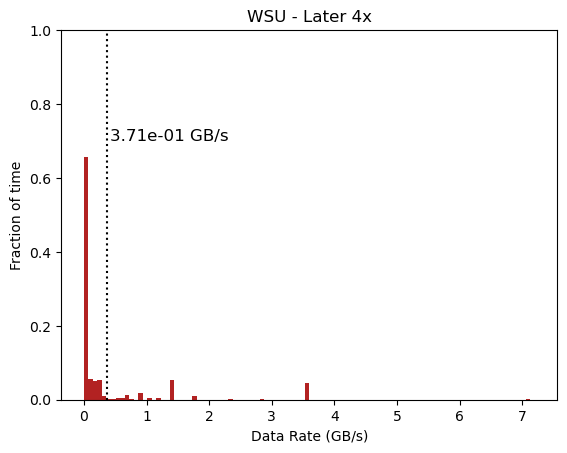

In [180]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=False,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later 4x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_4x_linear.png')

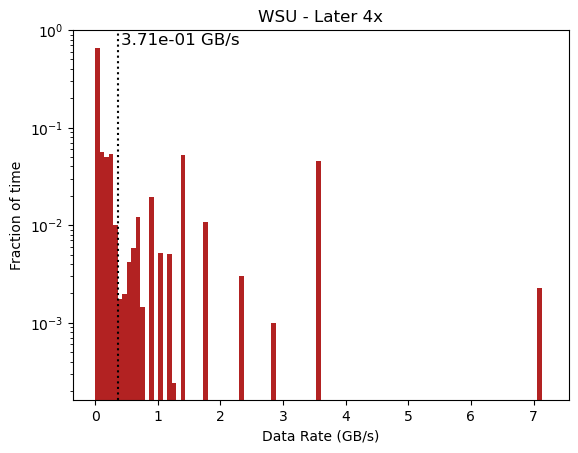

In [181]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later 4x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_4x.png')

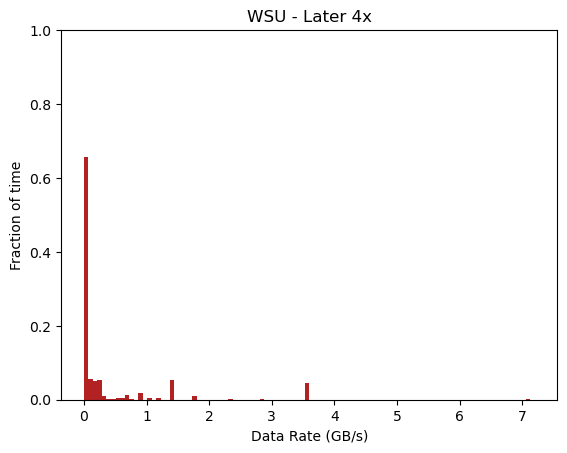

In [182]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=False,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later 4x',
                                   add_wavg=False,
                                   pltname='plots/datarate_later_4x_linear_nowavg.png')

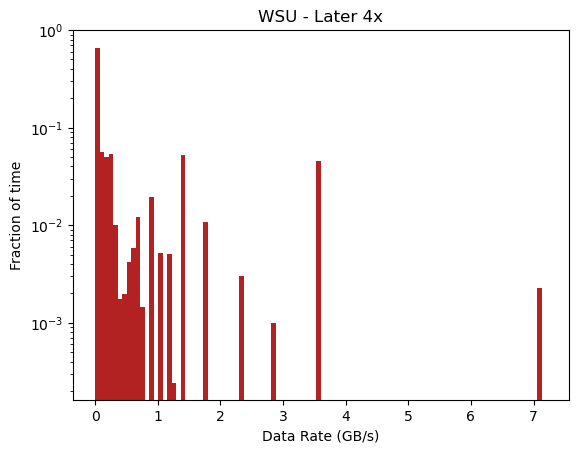

In [183]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=True,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later 4x',
                                   add_wavg=False,
                                   pltname='plots/datarate_later_4x_nowavg.png')

# ratio of science to cal visibilities

In [184]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

In [185]:
wsu_all['wsu_datavol_later_4x_stepped2_typical_cal']

<Quantity [3.6145824, 1.5320448, 1.5320448, ..., 2.9887488, 2.9670912,
           0.5873472] Gbyte>

In [186]:
np.max(wsu_all['wsu_datavol_early_stepped2_typical_cal'])

<Quantity 15222.6415488 Gbyte>

In [187]:
np.min(wsu_all['wsu_datavol_early_stepped2_typical_cal'].value)

0.0218592

Text(0.5, 0, 'TB')

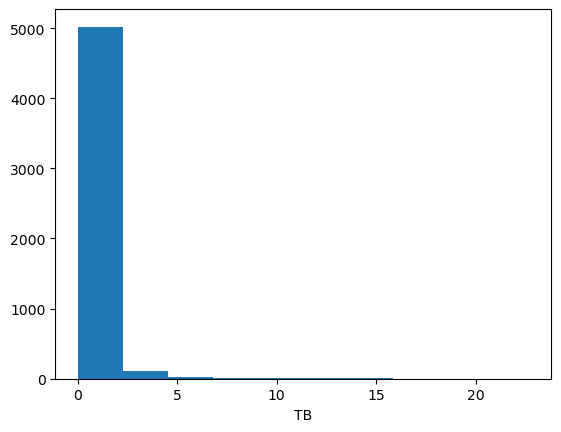

In [188]:
plt.hist(wsu_all['wsu_datavol_later_2x_stepped2_typical_cal'].to('TB').value)
plt.xlabel('TB')

Text(0.5, 0, 'TB')

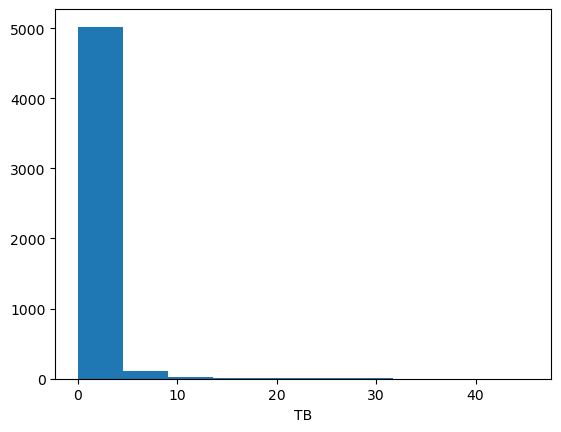

In [189]:
plt.hist(wsu_all['wsu_datavol_later_4x_stepped2_typical_cal'].to('TB').value)
plt.xlabel('TB')

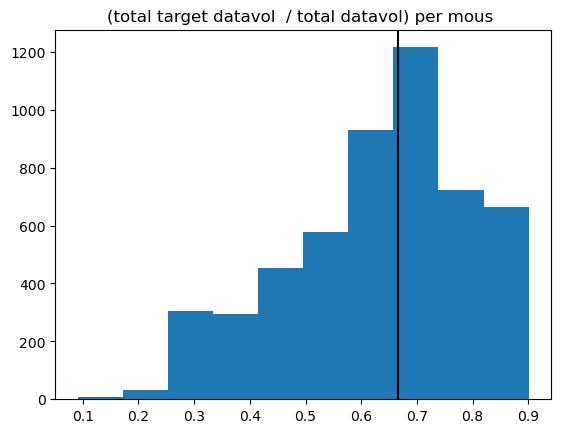

In [190]:
plt.hist(wsu_all['wsu_datavol_later_4x_stepped2_typical_target_tot'].to('TB').value
         /wsu_all['wsu_datavol_later_4x_stepped2_typical_total'].to('TB').value)
plt.title('(total target datavol  / total datavol) per mous ')
plt.axvline(2/3.0,color='black')

In [191]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']))

<Quantity 4.77275432>